# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint
from datetime import date

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = api_keys.api_key
units='imperial'
c = 0
#Initialize weather data dataframe
weather_data_df = pd.DataFrame(columns=["City", "Cloudiness","Country", "Date", "Humidity","Lat", "Lng","Max Temp", "Wind Speed"])
print("Beginning Data Retrieval")    
print("-----------------------------")
analysis_date = date.today()
for i , city in enumerate(cities):
    # Build query URL and request weather data for the city    
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json.get('name'):
        c += 1
        print("Processing Record {} of Set 1 | {}".format(c, weather_json['name']))
        cloudiness = float(weather_json['clouds']['all'])
        country = weather_json['sys']['country']
        dt = weather_json['dt']
        humidity = float(weather_json['main']['humidity'])
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        temp_max = float(weather_json['main']['temp_max'])
        wind_speed = float(weather_json['wind']['speed'])
        #Add row to weather data
        weather_data_df.loc[i] = [city, cloudiness, country, dt, humidity, lat, lng, temp_max, wind_speed]
    else:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete ")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Montorio al Vomano
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Puerto Ayora
Processing Record 4 of Set 1 | Contamana
Processing Record 5 of Set 1 | Rikitea
Processing Record 6 of Set 1 | Alamosa
Processing Record 7 of Set 1 | Hermanus
Processing Record 8 of Set 1 | Arraial do Cabo
Processing Record 9 of Set 1 | Rawson
Processing Record 10 of Set 1 | Sao Miguel do Araguaia
Processing Record 11 of Set 1 | Katherine
Processing Record 12 of Set 1 | Ribeira Grande
Processing Record 13 of Set 1 | Wajima
Processing Record 14 of Set 1 | Cape Town
Processing Record 15 of Set 1 | Atuona
Processing Record 16 of Set 1 | Hobart
Processing Record 17 of Set 1 | Chokurdakh
Processing Record 18 of Set 1 | Naryan-Mar
Processing Record 19 of Set 1 | Airai
Processing Record 20 of Set 1 | Sistranda
Processing Record 21 of Set 1 | Ushuaia
Processing Record 22 of Set 1 | Praia
Processing Record 23 o

Processing Record 185 of Set 1 | Mahebourg
Processing Record 186 of Set 1 | Krasnaya Gora
Processing Record 187 of Set 1 | Manzhouli
Processing Record 188 of Set 1 | Talas
Processing Record 189 of Set 1 | Pacific Grove
Processing Record 190 of Set 1 | Saldanha
Processing Record 191 of Set 1 | Coahuayana
Processing Record 192 of Set 1 | Yulara
Processing Record 193 of Set 1 | Mecca
Processing Record 194 of Set 1 | San Policarpo
Processing Record 195 of Set 1 | Salem
Processing Record 196 of Set 1 | Cayenne
Processing Record 197 of Set 1 | Zhoucheng
Processing Record 198 of Set 1 | Praia da Vitoria
Processing Record 199 of Set 1 | Hailar
Processing Record 200 of Set 1 | Salisbury
Processing Record 201 of Set 1 | Salekhard
Processing Record 202 of Set 1 | Ambilobe
City not found. Skipping...
Processing Record 203 of Set 1 | Jumla
Processing Record 204 of Set 1 | Bonavista
Processing Record 205 of Set 1 | Pathein
Processing Record 206 of Set 1 | Codrington
Processing Record 207 of Set 1 | 

Processing Record 369 of Set 1 | Talnakh
City not found. Skipping...
Processing Record 370 of Set 1 | Faanui
City not found. Skipping...
Processing Record 371 of Set 1 | Barcelona
City not found. Skipping...
Processing Record 372 of Set 1 | Diapaga
Processing Record 373 of Set 1 | Huarmey
Processing Record 374 of Set 1 | Ahuimanu
Processing Record 375 of Set 1 | Odlabari
City not found. Skipping...
Processing Record 376 of Set 1 | Altamira
Processing Record 377 of Set 1 | Kaa-Khem
Processing Record 378 of Set 1 | Bambous Virieux
Processing Record 379 of Set 1 | Javanrud
Processing Record 380 of Set 1 | Benguela
Processing Record 381 of Set 1 | Beloha
Processing Record 382 of Set 1 | Lisala
Processing Record 383 of Set 1 | Te Anau
Processing Record 384 of Set 1 | Rio Gallegos
Processing Record 385 of Set 1 | Caravelas
Processing Record 386 of Set 1 | Carrefour
Processing Record 387 of Set 1 | Mezen
Processing Record 388 of Set 1 | Nanlong
Processing Record 389 of Set 1 | Mayo
Processing

Processing Record 550 of Set 1 | Kapitan Ramon
Processing Record 551 of Set 1 | Kaeo
Processing Record 552 of Set 1 | Mae Hong Son
Processing Record 553 of Set 1 | Nioro
Processing Record 554 of Set 1 | Mompos
Processing Record 555 of Set 1 | Pailitas
Processing Record 556 of Set 1 | Eyl
Processing Record 557 of Set 1 | Imeni Poliny Osipenko
Processing Record 558 of Set 1 | Riberalta
Processing Record 559 of Set 1 | Vostok
Processing Record 560 of Set 1 | Salalah
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
#Export the city data into a .csv.
weather_data_df.to_csv("weather_data.csv")
weather_data_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [71]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,montorio al vomano,90.0,IT,1545594900,93.0,42.58,13.64,51.80,3.36
1,albany,90.0,US,1545594960,55.0,42.65,-73.75,33.98,8.05
2,puerto ayora,40.0,EC,1545595200,62.0,-0.74,-90.35,86.00,17.22
3,contamana,24.0,PE,1545597956,52.0,-7.35,-75.01,88.53,6.29
4,rikitea,64.0,PF,1545597956,98.0,-23.12,-134.97,78.85,19.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

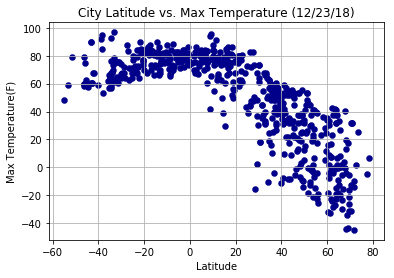

In [72]:
lat_temp_plt = weather_data_df.plot.scatter(x='Lat',y='Max Temp',marker="o",LineWidth=2,color="darkblue")
from datetime import date
# Create a title, x label, and y label for our chart
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs. Max Temperature ({})'.format(analysis_date.strftime('%m/%d/%y')))
plt.grid(True)
plt.savefig("Latitude_vs_Temperature_Plot.png")

#### Latitude vs. Humidity Plot

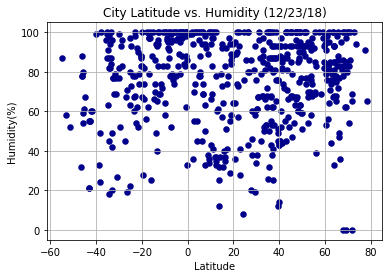

In [73]:
lat_humidity_plt = weather_data_df.plot.scatter(x="Lat", y="Humidity",marker="o",LineWidth=2,color="darkblue")
# Create a title, x label, and y label for our chart
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity ({})'.format(analysis_date.strftime('%m/%d/%y')))
plt.grid(True)
plt.savefig("Latitude_vs_Humidity_Plot.png")

#### Latitude vs. Cloudiness Plot

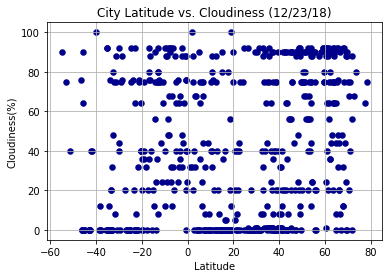

In [74]:
lat_cloudiness_plt = weather_data_df.plot.scatter(x="Lat", y="Cloudiness",marker="o",LineWidth=2,color="darkblue")
# Create a title, x label, and y label for our chart
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness ({})'.format(analysis_date.strftime('%m/%d/%y')))
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness_Plot.png")

#### Latitude vs. Wind Speed Plot

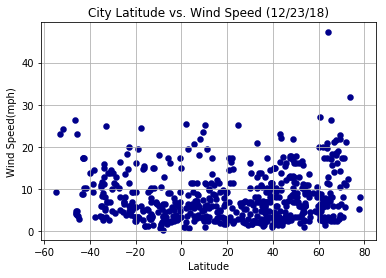

In [75]:
lat_windspeed_plt = weather_data_df.plot.scatter(x="Lat", y="Wind Speed",marker='o',linewidth=2,color="darkblue")
# Create a title, x label, and y label for our chart
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed ({})'.format(analysis_date.strftime('%m/%d/%y')))
plt.grid(True)
plt.savefig("Latitude_vs_WindSpeed_Plot.png")